In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from time import time
import logging

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [14]:
b = pd.read_pickle('shear_rate_10k')
c = pd.read_pickle('shear_rate_20k')
d = pd.read_pickle('shear_rate_25k')
e = pd.read_pickle('shear_rate_30k')
f = pd.read_pickle('shear_rate_40k')
g = pd.read_pickle('shear_rate_50k')
h = pd.read_pickle('shear_rate_90k')
X=b
for i in [c,d,e,f,g,h]:
    X=X.append(i)

In [15]:
y = X[['shear rate']].values.ravel()
#print(y)
X=X.drop(columns=['shear rate'])
#print(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label=le.fit_transform(y_train)

label

array([6, 4, 6, ..., 6, 6, 3], dtype=int64)

In [18]:
import sklearn.preprocessing as pre

x_scaler = pre.StandardScaler()
scaled_x = x_scaler.fit_transform(X_train)

In [19]:
# Train a SVM classification model

print("Fitting the classifier to the training set")
#t0 = time()
#param_grid = {'C': [5e2, 1e3, 5e3, 1e4, 5e4],
#              'gamma': [0.001, 0.005, 0.01, 0.05, 0.1], }
#clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
#                  param_grid, iid=False)
#clf = clf.fit(scaled_x, label)
#print("done in %0.3fs" % (time() - t0))
#print("Best estimator found by grid search:")
#print(clf.best_estimator_)

clf = SVC(C=1e4, gamma=1e-2)
clf = clf.fit(scaled_x, label)

Fitting the classifier to the training set


Predicting shear rate on the test set
done in 0.089s
              precision    recall  f1-score   support

           0       0.58      0.21      0.31       167
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00       106
           4       0.51      0.67      0.58       233
           5       0.35      0.21      0.26       141
           6       0.71      0.96      0.81       642

    accuracy                           0.63      1318
   macro avg       0.31      0.29      0.28      1318
weighted avg       0.55      0.63      0.57      1318



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


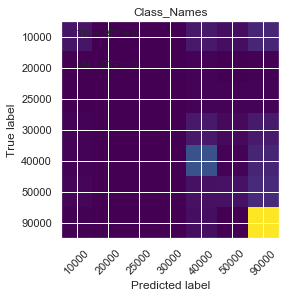

In [22]:
print("Predicting shear rate on the test set")
t0 = time()
y_pred = clf.predict(x_scaler.transform(X_test))
print("done in %0.3fs" % (time() - t0))

print(classification_report(le.transform(y_test), y_pred))

cm = confusion_matrix(le.transform(y_test), y_pred)

shear_rate=np.array([10000,20000,25000,30000,40000,50000,90000])
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
plt.title('Class_Names')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(shear_rate))
plt.xticks(tick_marks, shear_rate, rotation=45)
plt.yticks(tick_marks, shear_rate)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [23]:
np.sum(le.transform(y_test)== y_pred)

835

In [24]:
np.sum(le.transform(y_test)!= y_pred)

483

In [10]:
# find PCA components
from sklearn.preprocessing import normalize

X = normalize(X) #standardscaler!!!!
print(X)
pca = PCA(n_components=5)
pca.fit(X)

print(pca.components_)
print(pca.explained_variance_)

[[ 0.02549122  0.95692187  0.25110697  0.14161441 -0.02326753]
 [ 0.01481382  0.97470963  0.19178456  0.11364971  0.00491098]
 [ 0.0284883   0.95253397  0.26513783  0.14491314 -0.02386565]
 ...
 [ 0.03695514  0.92918355  0.33688677  0.13611112 -0.05686222]
 [ 0.01414073  0.9677359   0.24231811  0.06407735 -0.02152407]
 [ 0.01715242  0.966581    0.24083448  0.08182789 -0.02701685]]
[[ 0.1170242  -0.24105976  0.90732678  0.31682121 -0.06766067]
 [-0.01510257 -0.00874569  0.10412005 -0.08771986  0.99053504]
 [-0.09153853 -0.03182692  0.32091487 -0.93469452 -0.11818436]
 [ 0.38652281 -0.8825146  -0.24976502 -0.09556655  0.01589217]
 [-0.91010882 -0.40245338 -0.02341395  0.09561764 -0.00650082]]
[6.44914141e-03 6.04859387e-04 4.16226968e-04 2.03493505e-05
 1.55159655e-06]


In [11]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label=le.fit_transform(y_train)

import sklearn.preprocessing as pre

x_scaler = pre.StandardScaler()
scaled_x = x_scaler.fit_transform(X_train_pca)

# Train a SVM classification model

print("Fitting the classifier to the training set")
clf = SVC(C=1e4, gamma=1e-2)
clf = clf.fit(X_train_pca, y_train)

Fitting the classifier to the training set


Predicting shear rate on the test set
done in 0.131s
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      90.0
         1.0       0.00      0.00      0.00     159.0
         2.0       0.00      0.00      0.00      11.0
         3.0       0.00      0.00      0.00      11.0
         4.0       0.00      0.00      0.00     102.0
         5.0       0.00      0.00      0.00     234.0
         6.0       0.00      0.00      0.00     149.0
         7.0       0.00      0.00      0.00     636.0
     10000.0       0.00      0.00      0.00       0.0
     30000.0       0.00      0.00      0.00       0.0
     40000.0       0.00      0.00      0.00       0.0
     50000.0       0.00      0.00      0.00       0.0

    accuracy                           0.00    1392.0
   macro avg       0.00      0.00      0.00    1392.0
weighted avg       0.00      0.00      0.00    1392.0



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


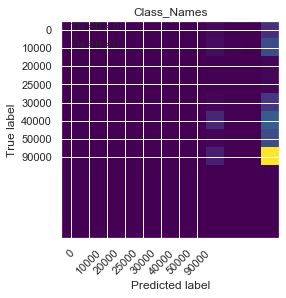

In [15]:
print("Predicting shear rate on the test set")
t0 = time()
y_pred = clf.predict(x_scaler.transform(X_test_pca))
print("done in %0.3fs" % (time() - t0))

print(classification_report(le.transform(y_test), y_pred))

cm = confusion_matrix(le.transform(y_test), y_pred)

shear_rate=np.array([10000,20000,25000,30000,40000,50000,90000])
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
plt.title('Class_Names')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(shear_rate))
plt.xticks(tick_marks, shear_rate, rotation=45)
plt.yticks(tick_marks, shear_rate)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()